# Principal component analysis (PCA)

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from visualize import pca, sne
from modelDefine import LeNet, MyNet
from datas import *

X_train, X_test, Y_train, Y_test = get_data("./datas")

In [2]:
# print the distribution of test set

categories, count = np.unique(Y_test, return_counts=True)
categories, count

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100], dtype=int64))

In [3]:
# sample 50 examples from each category

X_samples = []

for category in range(10):
    sample_indices = np.random.choice(100, size=50, replace=False)
    X_samples.append(X_train[Y_train == category][sample_indices])

X_samples = np.concatenate(X_samples)
X = torch.from_numpy(X_samples)

In [4]:
# load LeNet

model = torch.load("./models/lenet.pth")

In [5]:
# get the hidden_values

hidden_values = [X]
layers = ['input', 'conv1', 'avg1', 'conv2', 'avg2', 'fc1', 'fc2', 'fc3', 'output']

def capture_hidden_values(module, input, output):
    hidden_values.append(output.detach())
    
for module in model.modules():
    module.register_forward_hook(capture_hidden_values)
    
output = model(X)

for hidden in hidden_values:
    print(hidden.shape)

torch.Size([500, 1, 32, 32])
torch.Size([500, 6, 28, 28])
torch.Size([500, 6, 14, 14])
torch.Size([500, 16, 10, 10])
torch.Size([500, 16, 5, 5])
torch.Size([500, 120])
torch.Size([500, 84])
torch.Size([500, 10])
torch.Size([500, 10])


In [6]:
# compute pca features for each hidden_value

pca_values = []

for hidden in hidden_values:
    pca_values.append(pca(hidden, 2))

In [7]:
colors = []
for i in range(10):
    colors += [f"C{i}"] * 50

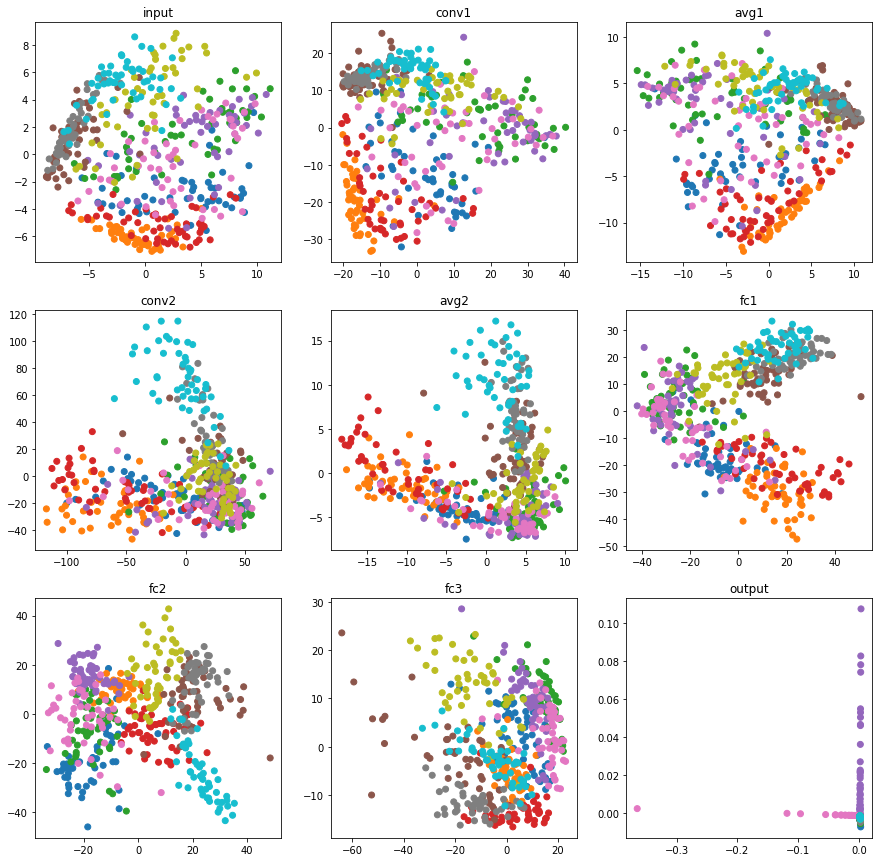

In [8]:
# each color stands for a category
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, layer in enumerate(layers[:]):
    hidden_pca = pca_values[i]
    feature1, feature2 = hidden_pca.t()
    axes[i//3, i % 3].scatter(feature1, feature2, c=colors)
    axes[i//3, i % 3].set_title(layer)

In [9]:
# load MyNet

mynet = torch.load("./models/mynet.pth")

In [10]:
# get the hidden_values

hidden_values = [X]
layers = ['input', 'conv1', 'max1', 'conv2', 'max2', 'fc1', 'fc2', 'fc3', 'output']

def capture_hidden_values(module, input, output):
    hidden_values.append(output.detach())
    
for module in mynet.modules():
    module.register_forward_hook(capture_hidden_values)
    
output = mynet(X)

for hidden in hidden_values:
    print(hidden.shape)

torch.Size([500, 1, 32, 32])
torch.Size([500, 6, 28, 28])
torch.Size([500, 6, 14, 14])
torch.Size([500, 16, 10, 10])
torch.Size([500, 16, 5, 5])
torch.Size([500, 120])
torch.Size([500, 84])
torch.Size([500, 10])
torch.Size([500, 10])


In [11]:
# compute pca features for each hidden_value

pca_values = []

for hidden in hidden_values:
    pca_values.append(pca(hidden, 2))

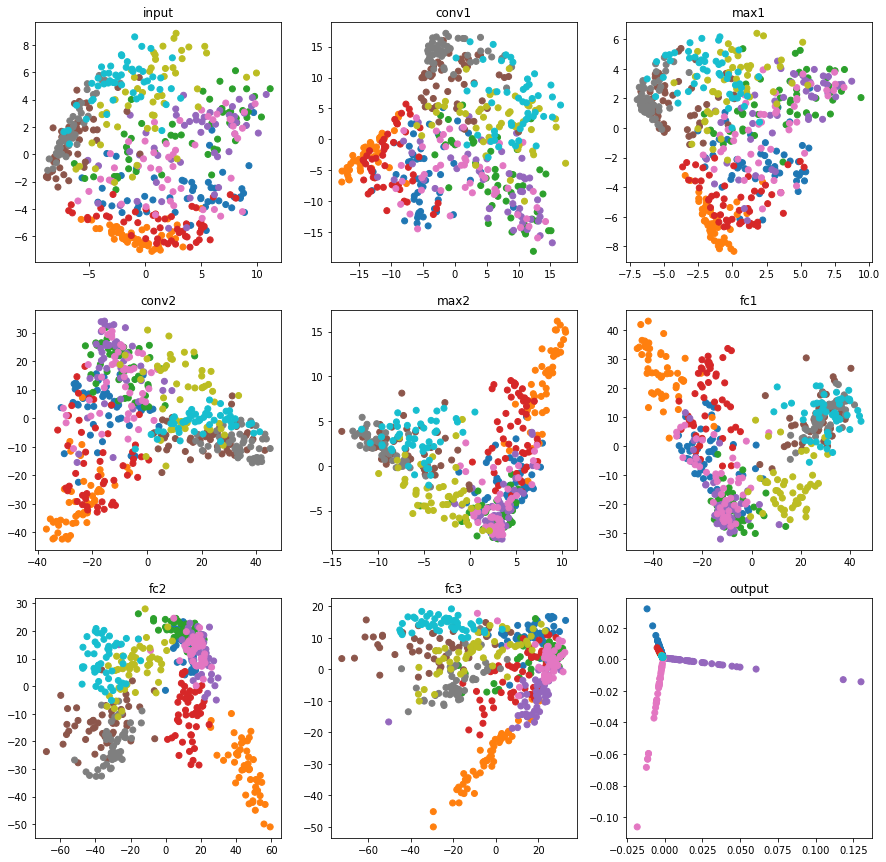

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, layer in enumerate(layers[:]):
    hidden_pca = pca_values[i]
    feature1, feature2 = hidden_pca.t()
    axes[i//3, i % 3].scatter(feature1, feature2, c=colors)
    axes[i//3, i % 3].set_title(layer)